<a href="https://colab.research.google.com/github/louaysboui/IA-_detection-and-datasets-/blob/main/Data_understanding_and_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab: Data preparation**

**Module**: Machine Learning for Cyber Security

**Teacher**: ML for Cyber Security Team

**Estimated time needed**: **90** minutes

# Data Preparation

Most of the real-world data, that the data scientist work with, are raw data, meaning that it can contain repeated, missing, and irrelevant entries of information. Hence, if this data is used in any machine learning analysis, it will result in low accuracy or incorrect prediction. For this reason, data cleaning, also known as data cleansing, is an important technique that comes prior to any model building.

In this notebook, we will take a look at some of the common data cleaning techniques that data scientists may use to prepare their data for analysis.

# *Objectives*

After completing this lab you will be able to:
*   Basic data understandig techniques
*   Looking for correlations
*   Use Log function to transform the data
*   Handle the duplicates
*   Handle the missing values
*   Standardize and normalize the data
*   Handle the outliers


# **Understandig the data**

# About the Malware dataset

The network traffic of a virtual machine on a Unix/Linux-based platform was used to build this dataset. The dataset includes the harmless actions of malware software for Android devices. It consists of 35 attributes (features) and 100,000 records (50,000 malware records and 50,000 benign ones). The dataset was created for classification and malware detection purposes. Table 1 in the attached paper includes detailed information about the attributes of this dataset.  

(5) (PDF) Malware Detection Using Deep Learning and Correlation-Based Feature Selection. Available from: https://www.researchgate.net/publication/366831941_Malware_Detection_Using_Deep_Learning_and_Correlation-Based_Feature_Selection [accessed Jan 26 2024].
[texte du lien](https://www.researchgate.net/publication/366831941_Malware_Detection_Using_Deep_Learning_and_Correlation-Based_Feature_Selection)

# Basic understanding techniques

In [ ]:
# Importing the neccessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [ ]:
# Reading the Dataset
df = pd.read_csv('Malware.csv')

In [ ]:
# DiSPLAY THE FIRST 5 ROWS OF THE DATASET
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,0.0


In [ ]:
#Move the Label to the last column

classification = df.columns[2]
signal_nvcsw = df.columns[-1]
temp_series = df[classification].copy()

# Replace the third column with the last column
df[classification] = df[signal_nvcsw]
df[signal_nvcsw] = temp_series
df.rename(columns={classification: signal_nvcsw, signal_nvcsw: classification}, inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_file.csv', index=False, sep=',')

In [ ]:
modified_df = pd.read_csv('modified_file.csv', sep=',')

# Display the head of the modified DataFrame
modified_df.head()

,hash,millisecond,signal_nvcsw,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,classification
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,0.0,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,malware
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,0.0,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,malware
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,0.0,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,malware
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,0.0,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,malware
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,0.0,0,0,3069378560,14274,0,0,0,...,0.0,0.0,120.0,0.0,3.204448e+09,380690.0,4.0,0.0,0.0,malware


In [ ]:
# Display the last 5 rows of the dataset
modified_df.tail()

,hash,millisecond,signal_nvcsw,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,classification
55481,DOCECG2.doctor.apk,481,0.0,0,0,3069423616,30531,0,0,0,...,12.0,1.0,114.0,0.0,3.204448e+09,409242.0,5.0,0.0,0.0,benign
55482,DOCECG2.doctor.apk,482,0.0,0,0,3069423616,30531,0,0,0,...,12.0,1.0,114.0,0.0,3.204448e+09,409242.0,5.0,0.0,0.0,benign
55483,DOCECG2.doctor.apk,483,0.0,0,0,3069423616,30531,0,0,0,...,12.0,1.0,114.0,0.0,3.204448e+09,409242.0,5.0,0.0,0.0,benign
55484,DOCECG2.doctor.apk,484,0.0,0,0,3069423616,30531,0,0,0,...,12.0,1.0,114.0,0.0,3.204448e+09,409242.0,5.0,0.0,0.0,benign
55485,DOCECG2.doctor.apk,485,NaN,0,0,3069423616,30531,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,benign


In [ ]:
# Display the shape of the dataset
modified_df.shape

(55486, 35)

In [ ]:
# Display information about the dataset
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55486 entries, 0 to 55485
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hash               55486 non-null  object 
 1   millisecond        55486 non-null  int64  
 2   signal_nvcsw       55485 non-null  float64
 3   state              55486 non-null  int64  
 4   usage_counter      55486 non-null  int64  
 5   prio               55486 non-null  int64  
 6   static_prio        55486 non-null  int64  
 7   normal_prio        55486 non-null  int64  
 8   policy             55486 non-null  int64  
 9   vm_pgoff           55486 non-null  int64  
 10  vm_truncate_count  55486 non-null  int64  
 11  task_size          55486 non-null  int64  
 12  cached_hole_size   55486 non-null  int64  
 13  free_area_cache    55486 non-null  int64  
 14  mm_users           55486 non-null  int64  
 15  map_count          55486 non-null  int64  
 16  hiwater_rss        554

In [ ]:
# provide a brief description of the dataset
modified_df.describe()

,millisecond,signal_nvcsw,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime
count,55486.000000,55485.0,5.548600e+04,55486.0,5.548600e+04,55486.000000,55486.0,55486.0,55486.0,55486.000000,...,55486.000000,55485.000000,55485.000000,55485.000000,55485.000000,5.548500e+04,55485.000000,55485.000000,55485.000000,55485.0
mean,497.248946,0.0,1.917091e+05,0.0,3.069649e+09,19204.878726,0.0,0.0,0.0,16155.955881,...,350911.317936,38.923763,1.638443,118.479229,1.289682,3.204448e+09,388404.924448,4.095341,1.778697,0.0
std,288.705204,0.0,1.200346e+06,0.0,2.832123e+05,4909.929253,0.0,0.0,0.0,2976.393936,...,9958.194097,60.309282,12.074529,2.758296,2.582022,0.000000e+00,9960.861197,0.846414,3.132683,0.0
min,0.000000,0.0,0.000000e+00,0.0,3.069190e+09,14019.000000,0.0,0.0,0.0,9698.000000,...,37411.000000,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371784.000000,3.000000,0.000000,0.0
25%,247.000000,0.0,0.000000e+00,0.0,3.069403e+09,15681.000000,0.0,0.0,0.0,13913.000000,...,344111.000000,2.000000,0.000000,120.000000,0.000000,3.204448e+09,381754.000000,3.000000,0.000000,0.0
50%,495.000000,0.0,0.000000e+00,0.0,3.069612e+09,17137.000000,0.0,0.0,0.0,15799.000000,...,347766.000000,10.000000,1.000000,120.000000,0.000000,3.204448e+09,385459.000000,4.000000,0.000000,0.0
75%,747.000000,0.0,4.096000e+03,0.0,3.069833e+09,22225.000000,0.0,0.0,0.0,18032.000000,...,354479.000000,53.000000,1.000000,120.000000,1.000000,3.204448e+09,392733.000000,5.000000,2.000000,0.0
max,999.000000,0.0,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,...,384520.000000,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.000000,0.0


In [ ]:
modified_df["classification"].value_counts()

benign     44486
malware    11000
Name: classification, dtype: int64

In [ ]:
print(modified_df['millisecond'].describe())

count    55486.000000
mean       497.248946
std        288.705204
min          0.000000
25%        247.000000
50%        495.000000
75%        747.000000
max        999.000000
Name: millisecond, dtype: float64


In [ ]:
modified_df["classification"].value_counts()
# modified_df.=dropna()

benign     44485
malware    11000
Name: classification, dtype: int64

In [ ]:
modified_df=modified_df.dropna()

In [ ]:
# Detecting the NaN values in the dataset
modified_df.isna().sum()

hash                 0
millisecond          0
signal_nvcsw         0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
classification       0
dtype: int64

In [ ]:
# Detecting the Null values in the dataset
modified_df.isnull().sum()

hash                 0
millisecond          0
signal_nvcsw         0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
classification       0
dtype: int64

# Handling the Missing Values

Text(0.5, 1.0, 'Total Missing Values')

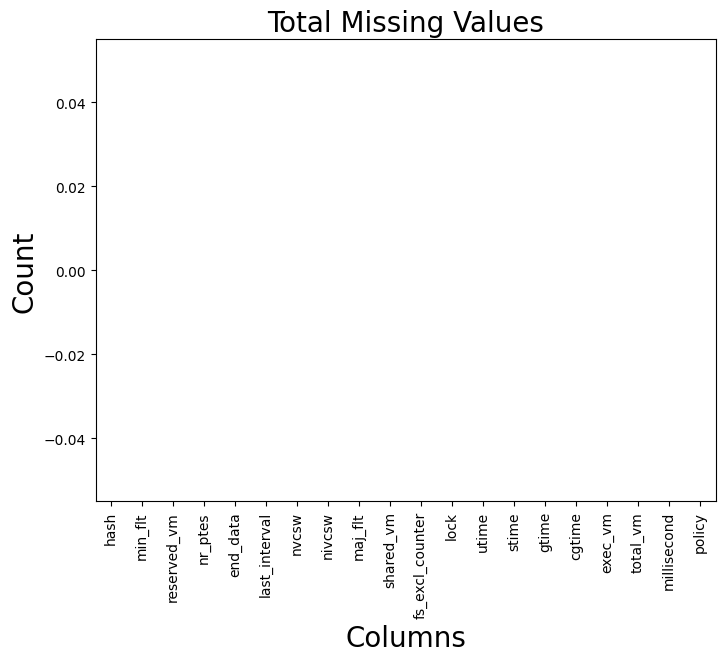

In [ ]:
total = modified_df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

 As we can see there is no missing values.
 In case of finding some missing values:

 1- We can drop the missing values, using `dropna()` method.texte en gras

 2- We can drop the whole attribute (column), that contains missing values, using the drop() method

# Handling the Duplicates

In [ ]:
modified_df.duplicated().sum()

0

In [ ]:
modified_df.index.is_unique

True

In [ ]:
modified_df[classification].value_counts()


benign     44485
malware    11000
Name: classification, dtype: int64

In [ ]:
# Trasnform the label "classification" to numerical values for better data understandig
modified_df['classification'].replace({'malware': 0, 'benign': 1}, inplace=True)
modified_df['classification'].value_counts()

1    44485
0    11000
Name: classification, dtype: int64

There is no duplicated rows

# Exploratory Data Analysis

**Looking for correlations**

In [ ]:
mal_num = modified_df.select_dtypes(include = ['float64', 'int64'])

mal_num_corr = mal_num.corr()['classification'][:-1] # -1 means that the latest row is SalePrice

top_features = mal_num_corr[abs(mal_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with classification:\n{}".format(len(top_features), top_features))

There is 0 strongly correlated values with classification:
Series([], Name: classification, dtype: float64)


In [ ]:
corr = modified_df.corr(numeric_only=True)
corr

,millisecond,signal_nvcsw,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,classification
millisecond,1.000000,NaN,-0.074084,NaN,0.006194,0.113410,NaN,NaN,NaN,0.367447,...,0.251538,-0.034508,-0.132628,0.173326,NaN,0.272577,0.251074,0.198986,NaN,-0.003877
signal_nvcsw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,-0.074084,NaN,1.000000,NaN,0.000411,0.016365,NaN,NaN,NaN,0.037468,...,-0.016955,-0.004020,0.024343,-0.028238,NaN,0.048577,-0.006972,-0.028885,NaN,0.057690
usage_counter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prio,0.006194,NaN,0.000411,NaN,1.000000,-0.015490,NaN,NaN,NaN,-0.080027,...,0.090833,-0.010353,0.123128,-0.001329,NaN,0.102116,0.205218,0.036612,NaN,0.017176
static_prio,0.113410,NaN,0.016365,NaN,-0.015490,1.000000,NaN,NaN,NaN,0.527223,...,0.032384,0.024561,-0.463048,0.104066,NaN,0.791681,0.152637,-0.064012,NaN,0.235822
normal_prio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vm_pgoff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vm_truncate_count,0.367447,NaN,0.037468,NaN,-0.080027,0.527223,NaN,NaN,NaN,1.000000,...,0.260902,0.007767,-0.326700,0.220907,NaN,0.786323,0.477447,0.205427,NaN,0.236379


**Plot the correlation matrix**

<ipython-input-45-7781507497a4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=modified_df.drop(['usage_counter','signal_nvcsw', 'normal_prio','policy','vm_pgoff','task_size','cached_hole_size','hiwater_rss','nr_ptes','lock','cgtime'],axis=1).corr()


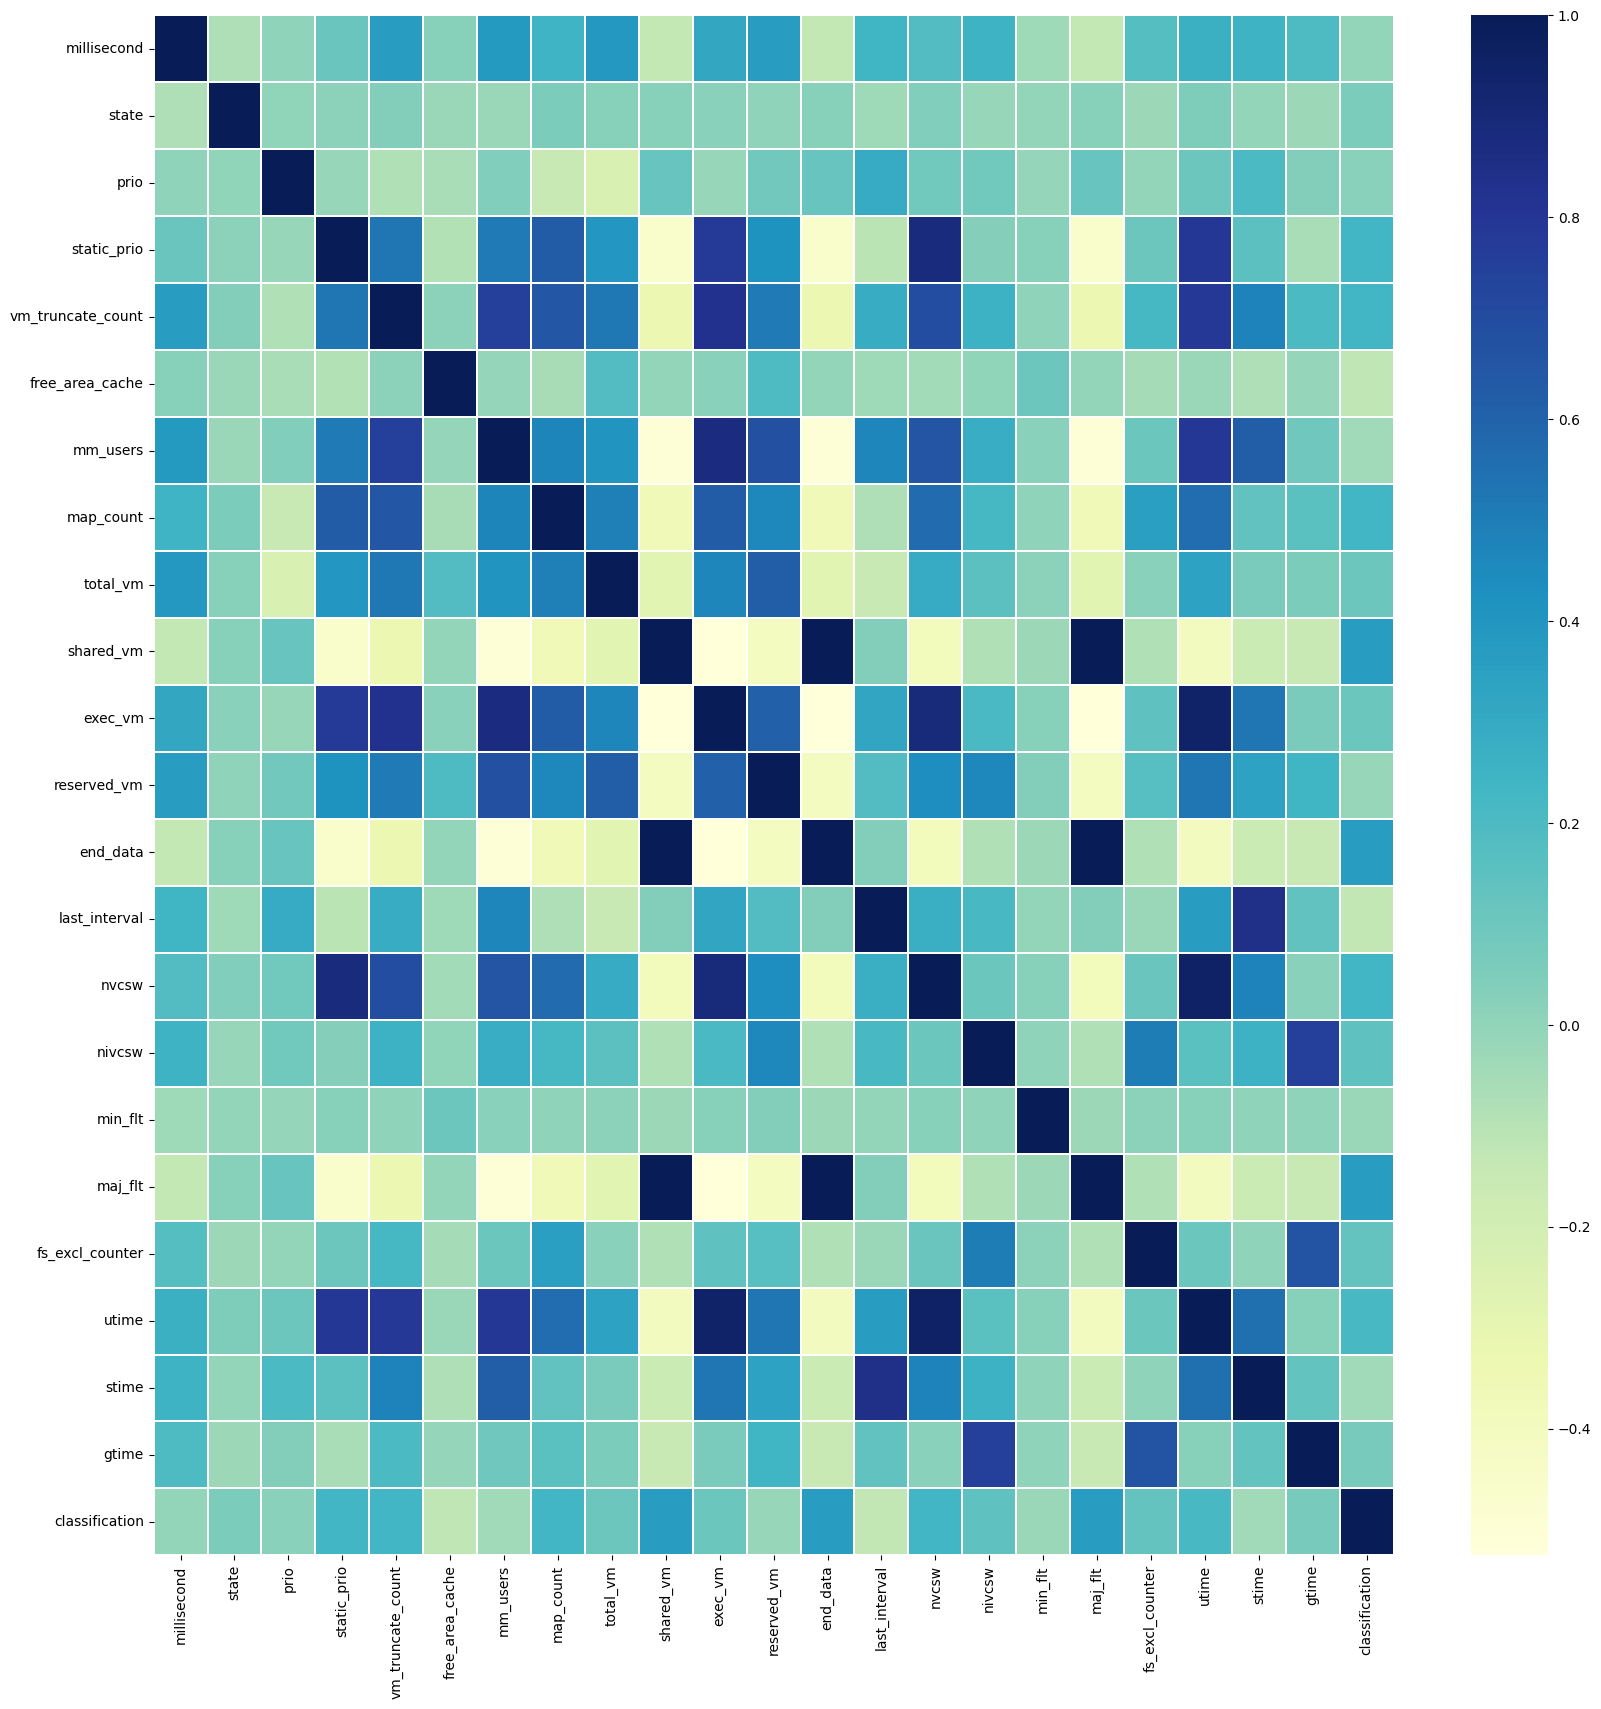

In [ ]:
corr = modified_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize =(20,20))

corr_matrix=modified_df.drop(['usage_counter','signal_nvcsw', 'normal_prio','policy','vm_pgoff','task_size','cached_hole_size','hiwater_rss','nr_ptes','lock','cgtime'],axis=1).corr()
sns.heatmap(corr_matrix,ax = ax,cmap ="YlGnBu", linewidths = 0.1)
plt.show()

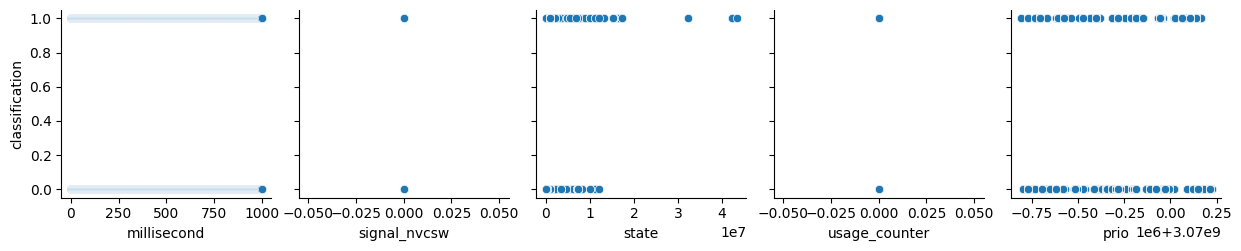

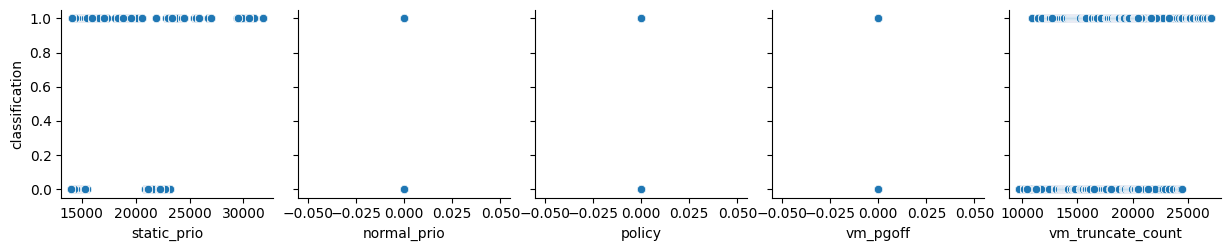

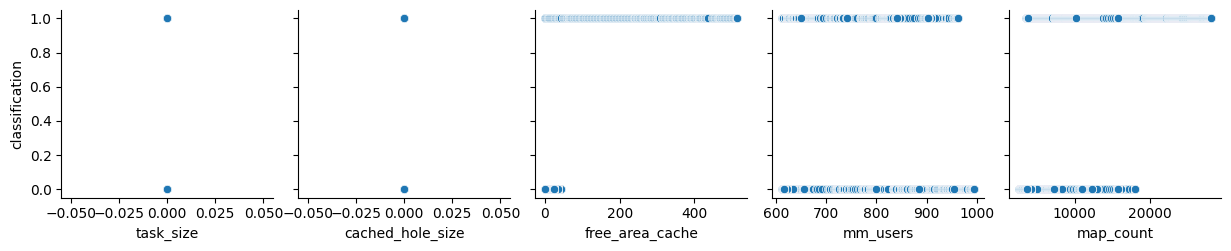

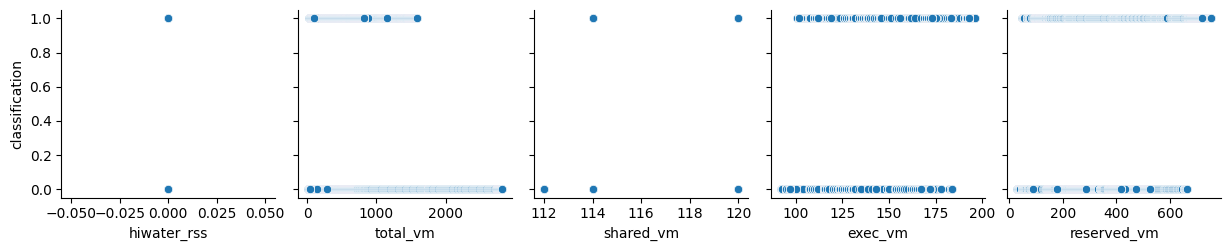

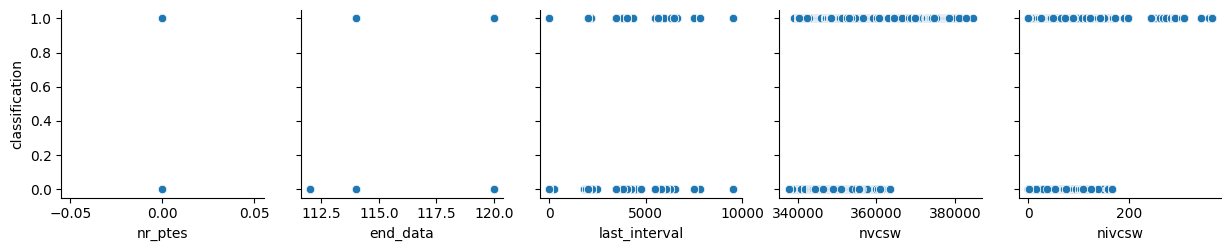

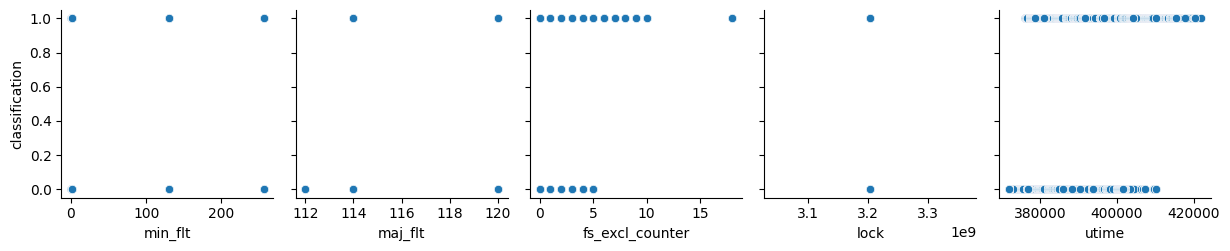

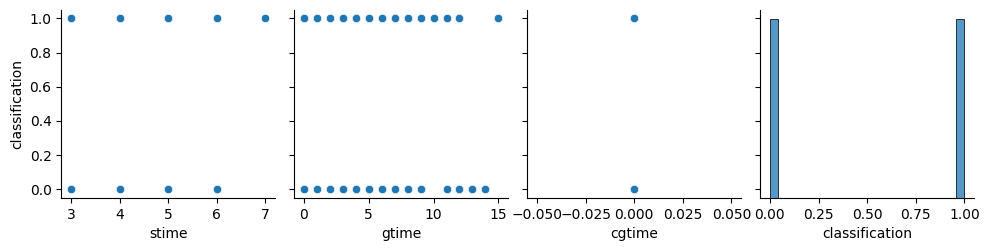

In [ ]:
# pairplots
for i in range(0, len(mal_num.columns), 5):
    sns.pairplot(data=mal_num,
                x_vars=mal_num.columns[i:i+5],
                y_vars=['classification'])

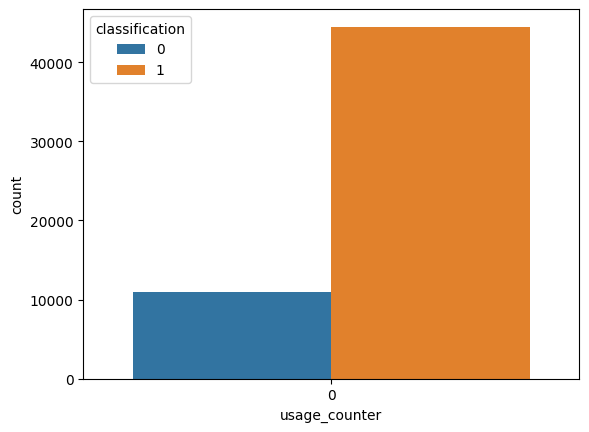

In [ ]:
sns.countplot(x = 'usage_counter',hue = "classification",data = modified_df)
plt.show()

# Log Transformation

In this section, we are going to inspect whether our 'Classification' data are normally distributed. The assumption of the normal distribution must be met in order to perform analysis like the regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'classification' distribution using the `distplot()` function from the `seaborn` library.

<ipython-input-49-614aa0d31eb7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  vm_untransformed = sns.distplot(modified_df['total_vm'])


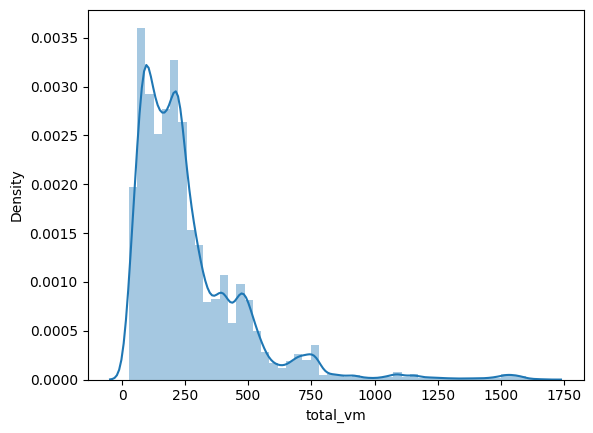

In [ ]:
vm_untransformed = sns.distplot(modified_df['total_vm'])


Here, we can simply use the `skew()` function to calculate our skewness level of the `vm_truncate_count`.

In [ ]:
print ("skewnes: %f" % modified_df['vm_truncate_count'].skew())

skewnes: 0.356882


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have \~1.7, so it is considered  highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) contains more information about the numpy log transform.

In [ ]:
log_transformed = np.log(modified_df['vm_truncate_count'])

<ipython-input-52-736b0486c753>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  vm_transformed = sns.distplot(log_transformed)


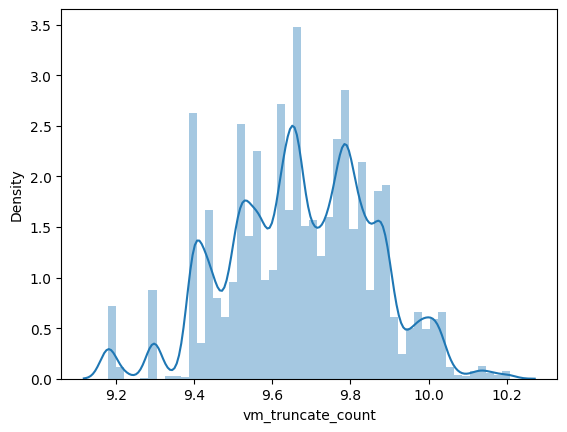

In [ ]:
vm_transformed = sns.distplot(log_transformed)

In [ ]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.184487


As we can see, the log method transformed the 'vm_truncate_count' distribution into a more symmetrical bell curve and the skewness level now is -0.18, well within the range.

There are other ways to correct for skewness of the data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

## **Feature Scaling**


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.


Scikit-learn library provides `MinMaxScaler` for normalization and `StandardScaler` for standardization needs. For more information on `scikit-learn` [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) please visit their respective documentation websites.

In [ ]:
scaled_data = StandardScaler().fit_transform(mal_num)
scaled_data

In [ ]:
norm_data = MinMaxScaler().fit_transform(mal_num)
norm_data

# Handling the Outliers

Finding the Outliers:

In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots.

# Bi-variate Analysis

we will look at the bi-variate analysis of the two features: 'classification', and  '', and plot the scatter plot of the relationship between these two parameters.

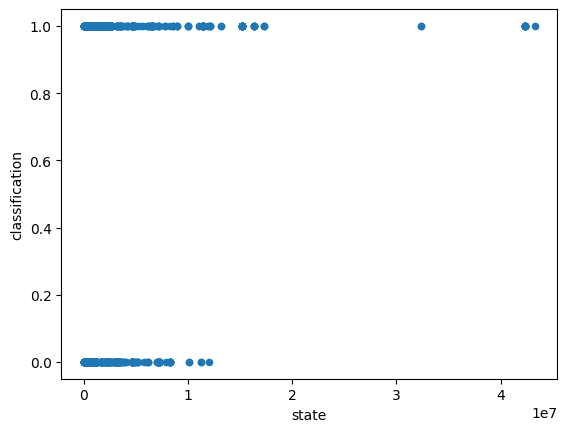

In [ ]:
outlier = modified_df.plot.scatter(x='state',
                      y='classification')

From the above graph, there are two values above 5000 sq. ft. living area that deviate from the rest of the population and do not seem to follow the trend. It can be speculated why this is happening but for the purpose of this lab we can delete them.

The other two observations on the top are also deviating from the rest of the points but they also seem to be following the trend, so, perhaps, they can be kept.

# Deleting the outliers

First, we will sort all of our 'Gr Liv Area' values and select only the last three.


In [ ]:
modified_df.sort_values(by = 'state', ascending = False)[:3]

,hash,millisecond,signal_nvcsw,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,classification
25674,audio.mp3.music.player.apk,674,0,43266048,0,3069714432,23351,0,0,0,...,55,0,120,4,3204448256,420350,5,4,0,1
15305,imoblife.toolbox.full.apk,305,0,42315776,0,3070021632,15806,0,0,0,...,27,0,120,0,3204448256,403976,4,0,0,1
15306,imoblife.toolbox.full.apk,306,0,42315776,0,3070021632,15806,0,0,0,...,27,0,120,0,3204448256,403976,4,0,0,1


Now we will use the pandas `drop()` function to remove these three rows.

In [ ]:
outliers_dropped = modified_df.drop(modified_df.index[[25674,15305,15306]])

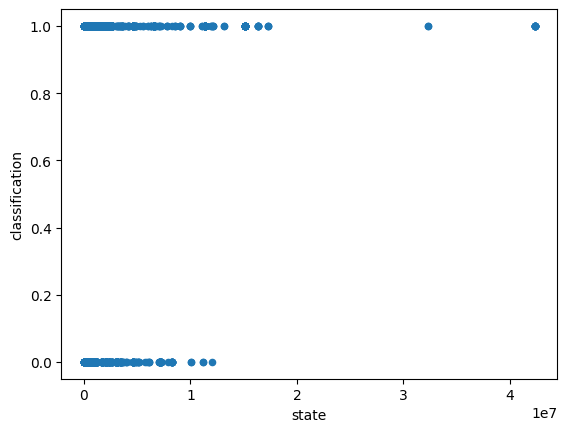

In [ ]:
new_plot = outliers_dropped.plot.scatter(x='state',
                                         y='classification')